# Data Gathering for Chicago400 Mapping Project

This notebook will download data for begining mapping project for Chicago400 mapping project.

In [1]:
# import the necessary packages
import pandas as pd
import numpy as np
import geopandas as gpd
import pickle
from sodapy import Socrata
from shapely.geometry import shape
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

# import api token
from src import *

## Use Socrata API to download datasets

### Custom API Function

Function to pull data from API.

In [2]:
def soc_api_dl(link, app_token, name='gdf'):
    '''
    Enter hyperlink from Scorata API to generate geodataframe
    from Socrata API
    Optional arg to name gdf
    '''
    client = Socrata(link.replace('https://','').replace('.json','').split("/")[0],app_token)
    results = client.get(link.split('/')[4].split('.')[0])
    name = gpd.GeoDataFrame.from_records(results)
    return name.head()
    

This is the general code for downloading data from using the Socrata API from City of Chicago Data

In [3]:
# set client request for Socrata API
client = Socrata("data.cityofchicago.org",app_token)

# make request using API endpoint
results = client.get("ejsh-fztr",limit=2000)

# create Dataframe out of request
parks = pd.DataFrame.from_records(results)

### API links for datasets

In [4]:
# links to with api endpoint for chicago
url_dict = {"parks":"https://data.cityofchicago.org/resource/ejsh-fztr.json",
"public_schools":"https://data.cityofchicago.org/resource/tz49-n8ze.json",
"bike_routes":"https://data.cityofchicago.org/resource/hvv9-38ut.json",
"chicago_city_boundary":"https://data.cityofchicago.org/resource/qqq8-j68g.json",
"chicago_zip":"https://data.cityofchicago.org/resource/unjd-c2ca.json",
"chicago_neighborhood":"https://data.cityofchicago.org/resource/y6yq-dbs2.json",
"chicago_ct":"https://data.cityofchicago.org/resource/74p9-q2aq.json",
"chicago_bg":"https://data.cityofchicago.org/resource/bt9m-d2mf.json",
# links with api endpoint for cook county
"schools_cook_county":"https://datacatalog.cookcountyil.gov/resource/hca5-e92p.json"}

Not sure how to loop through dictionary with custom function and apply to all url. Will manually download for now.

In [5]:
# # create list of df names from url_dict
# df_names = []
# for n in url_dict.items():
#     df_names.append(i[0])
    
# print(df_names)

In [6]:
# # example of how I would name using custom function
# parks_df = soc_api_dl(parks_url,app_token)

## Manually Import downloaded Data

### Forestry

- Polygon's and Multipolygon's
- NAD83 Illinois East (ftUS) EPSG:3435
- 19 total records

In [7]:
# manually import each zip
forestry = gpd.read_file(
    "zip:///Users/justinwilliams/projects/chicago400/data/Forestry.zip")

# set name of gdf
forestry.name = 'forestry'

In [8]:
forestry.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   AREA        19 non-null     float64 
 1   PERIMETER   19 non-null     float64 
 2   FOREST_     19 non-null     int64   
 3   FOREST_ID   19 non-null     int64   
 4   NAME        19 non-null     object  
 5   EDIT_DATE1  19 non-null     object  
 6   FID_        0 non-null      object  
 7   SHAPE_AREA  19 non-null     float64 
 8   SHAPE_LEN   19 non-null     float64 
 9   geometry    19 non-null     geometry
dtypes: float64(4), geometry(1), int64(2), object(3)
memory usage: 1.6+ KB


In [9]:
forestry.crs

<Projected CRS: EPSG:3435>
Name: NAD83 / Illinois East (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: USA - Illinois - SPCS - E
- bounds: (-89.28, 37.06, -87.02, 42.5)
Coordinate Operation:
- name: SPCS83 Illinois East zone (US Survey feet)
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [10]:
forestry.head()

,AREA,PERIMETER,FOREST_,FOREST_ID,NAME,EDIT_DATE1,FID_,SHAPE_AREA,SHAPE_LEN,geometry
0,2.144996e+07,37340.04869,1,2,CATHRINE CHEVALIER WOODS,03-21-01,None,2.144996e+07,37340.064884,"MULTIPOLYGON (((1116598.400 1932500.000, 11165..."
1,1.878679e+07,48679.85682,2,8,SHILLER WOODS NORTH,03-21-01,None,1.878679e+07,48679.859013,"MULTIPOLYGON (((1115000.000 1927103.090, 11149..."
2,1.507464e+06,4878.06941,3,9,SHILLER PLAYFIELD,03-21-01,None,1.507464e+06,4878.068560,"POLYGON ((1120638.930 1926922.840, 1120632.440..."
3,2.405552e+07,27200.18266,4,3,SHILLER WOODS SOUTH,03-21-01,None,2.405551e+07,27200.178457,"MULTIPOLYGON (((1115000.000 1922223.430, 11150..."
4,5.991599e+06,16391.37539,5,10,SIDNEY YATES FLATWOODS,03-21-01,None,5.991605e+06,16391.364149,"POLYGON ((1135000.000 1942163.200, 1134922.100..."


### Bike Routes

- Linestring
- 897 records
- some null values on certain datapoints (not geometry though)
- WGS 84 EPSG: 4326 (lat/lon)
- need a data dictionary to comprehend some of the cols

In [11]:
bike_routes = gpd.read_file(
    "zip:///Users/justinwilliams/projects/chicago400/data/Bike Routes.zip")

bike_routes.name = 'bike_routes'

In [12]:
bike_routes.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 897 entries, 0 to 896
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   displayrou  897 non-null    object  
 1   f_street    873 non-null    object  
 2   l_f_addr    870 non-null    object  
 3   l_t_addr    897 non-null    float64 
 4   mi_ctrline  897 non-null    float64 
 5   objectid    897 non-null    float64 
 6   oneway_dir  129 non-null    object  
 7   pre_dir     872 non-null    object  
 8   r_f_addr    897 non-null    float64 
 9   r_t_addr    897 non-null    float64 
 10  st_name     873 non-null    object  
 11  st_type     825 non-null    object  
 12  street      873 non-null    object  
 13  t_street    873 non-null    object  
 14  geometry    897 non-null    geometry
dtypes: float64(5), geometry(1), object(9)
memory usage: 105.2+ KB


In [13]:
bike_routes.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [14]:
bike_routes.head()

,displayrou,f_street,l_f_addr,l_t_addr,mi_ctrline,objectid,oneway_dir,pre_dir,r_f_addr,r_t_addr,st_name,st_type,street,t_street,geometry
0,BIKE LANE,S CENTRAL PARK AVE,3201,3557.0,0.495170,1.0,None,W,3200.0,3556.0,MARQUETTE,RD,MARQUETTE RD,S KEDZIE AVE,"LINESTRING (-87.70297 41.77167, -87.70297 41.7..."
1,SHARED-LANE,S KEDZIE AVE,3159,3001.0,0.252403,2.0,None,W,3158.0,3000.0,MARQUETTE,RD,MARQUETTE RD,S SACRAMENTO AVE,"LINESTRING (-87.69808 41.77175, -87.69821 41.7..."
2,BIKE LANE,S DAMEN AVE,1901,1401.0,0.757321,3.0,None,W,1900.0,1400.0,18TH,ST,18TH ST,S LOOMIS ST,"LINESTRING (-87.66132 41.85788, -87.66149 41.8..."
3,BUFFERED BIKE LANE,E 81ST ST,8100,8700.0,0.754309,4.0,None,S,8101.0,8701.0,LAKE SHORE,DR,LAKE SHORE DR,E 87TH ST,"LINESTRING (-87.54056 41.74844, -87.54055 41.7..."
4,PROTECTED BIKE LANE,N KEDZIE AVE,3101,2063.0,1.522768,5.0,None,W,3100.0,2060.0,LAKE,ST,LAKE ST,N DAMEN AVE,"LINESTRING (-87.67674 41.88498, -87.67706 41.8..."


### Public Schools

- Point geometry (will need to match with parcels from buildlings file or export from OSM)
- 654 records (is this accurate?)
- WGS 84 EPSG: 4326 (lat/lon)

In [15]:
public_schools = gpd.read_file(
    "zip:///Users/justinwilliams/projects/chicago400/data/Chicago Public Schools - School Locations SY1920.zip")

public_schools.name = 'public_schools'

In [16]:
public_schools.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 654 entries, 0 to 653
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   school_id  654 non-null    object  
 1   school_nm  654 non-null    object  
 2   sch_addr   654 non-null    object  
 3   grade_cat  654 non-null    object  
 4   grades     654 non-null    object  
 5   sch_type   654 non-null    object  
 6   x          654 non-null    float64 
 7   y          654 non-null    float64 
 8   geometry   654 non-null    geometry
dtypes: float64(2), geometry(1), object(6)
memory usage: 46.1+ KB


In [17]:
public_schools.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [18]:
public_schools.head()

,school_id,school_nm,sch_addr,grade_cat,grades,sch_type,x,y,geometry
0,610587,DYETT ARTS HS,"555 E 51ST ST, 60615",HS,"9, 10, 11, 12",Traditional,-87.612239,41.801204,POINT (-87.61224 41.80120)
1,400111,LEARN - PERKINS,"1700 W 83RD ST, 60620",ES,"K, 1, 2, 3, 4, 5, 6, 7",Traditional,-87.665721,41.743122,POINT (-87.66572 41.74312)
2,610568,PATHWAYS - AVONDALE HS,"3100 W BELMONT AVE, 60618",HS,"9, 10, 11, 12",Options,-87.705206,41.939433,POINT (-87.70521 41.93943)
3,610027,KIPLING,"9351 S LOWE AVE, 60620",ES,"PK, K, 1, 2, 3, 4, 5, 6, 7, 8",Traditional,-87.639521,41.723627,POINT (-87.63952 41.72363)
4,609712,HIRSCH HS,"7740 S INGLESIDE AVE, 60619",HS,"9, 10, 11, 12",Traditional,-87.601727,41.753748,POINT (-87.60173 41.75375)


### OSM Schools
- 725 records
- a bunch of null values for certain attributes, however all geometry is present
- WGS 84 4236
- Polygon and Multipolygon

In [19]:
schools_osm = gpd.read_file(
    "zip:///Users/justinwilliams/projects/chicago400/data/Schools_Chicago_OSM.zip")
schools_osm.name = 'schools_osm'

In [20]:
schools_osm.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 725 entries, 0 to 724
Data columns (total 47 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   full_id     725 non-null    object  
 1   osm_id      725 non-null    object  
 2   osm_type    725 non-null    object  
 3   addr_city   92 non-null     object  
 4   addr_house  127 non-null    object  
 5   addr_postc  91 non-null     object  
 6   addr_stree  127 non-null    object  
 7   addr_str_1  74 non-null     object  
 8   addr_str_2  74 non-null     object  
 9   addr_str_3  74 non-null     object  
 10  amenity     725 non-null    object  
 11  building    82 non-null     object  
 12  building_l  38 non-null     object  
 13  chicago_bu  71 non-null     object  
 14  name        725 non-null    object  
 15  type        5 non-null      object  
 16  ele         491 non-null    object  
 17  gnis_count  488 non-null    object  
 18  gnis_creat  489 non-null    object  
 19  

In [21]:
schools_osm.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
schools_osm.head()

,full_id,osm_id,osm_type,addr_city,addr_house,addr_postc,addr_stree,addr_str_1,addr_str_2,addr_str_3,...,gnis_edite,name_lv,school,school_for,alt_name,disused,name_en,operator_1,parking,geometry
0,r2201195,2201195,relation,Chicago,2929,60623,West 19th Street,19th,West,Street,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.70042 41.85538, -87.70021 41.855..."
1,r2817129,2817129,relation,None,1746-1750,None,West Roosevelt Road,Roosevelt,West,Road,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.67103 41.86714, -87.67104 41.867..."
2,r3104734,3104734,relation,None,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-87.61625 41.81400, -87.61626 41.814..."
3,r5241077,5241077,relation,Chicago,211,60607,South Laflin Street,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-87.66417 41.87649, -87.66418 ..."
4,r5245906,5245906,relation,Chicago,1147,60622,North Western Avenue,None,None,None,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-87.68682 41.90291, -87.68472 ..."


In [23]:
schools_osm.name

0      schools_osm
1      schools_osm
2      schools_osm
3      schools_osm
4      schools_osm
          ...     
720    schools_osm
721    schools_osm
722    schools_osm
723    schools_osm
724    schools_osm
Name: name, Length: 725, dtype: object

### Cook County School Data

- 2332 records
- will have to utilize chicago city boundaries to only return records within that geometry to segment chicago
- was bought into QGIS to clean up 5 records that had invalid Geometry types.

In [24]:
school_cook_county = gpd.read_file(
    "zip:///Users/justinwilliams/projects/chicago400/data/SchoolBoundaries2014QGIS.zip")

school_cook_county.name = "school_cook_county"

In [25]:
school_cook_county.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 2332 entries, 0 to 2331
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   address     2332 non-null   object  
 1   cfname      2332 non-null   object  
 2   cfsubtype   2332 non-null   object  
 3   cftype      2332 non-null   object  
 4   comment     141 non-null    object  
 5   community   2332 non-null   object  
 6   gniscode    2332 non-null   float64 
 7   jurisdicti  2154 non-null   object  
 8   mergeid     2332 non-null   object  
 9   shape_area  2332 non-null   float64 
 10  shape_len   2332 non-null   float64 
 11  source      2332 non-null   object  
 12  geometry    2332 non-null   geometry
dtypes: float64(3), geometry(1), object(9)
memory usage: 237.0+ KB


In [26]:
school_cook_county.head()

,address,cfname,cfsubtype,cftype,comment,community,gniscode,jurisdicti,mergeid,shape_area,shape_len,source,geometry
0,2002 E 223rd St,Strassburg Elementary School,Public School,School,None,Sauk Village,419204.0,SCHOOL DIST #168,10000,297100.215862,2831.357884,ACGIL,"POLYGON ((452659.477 4592503.710, 452659.547 4..."
1,22012 Torrence Ave,Saint Mark's Lutheran School,Non Public School,School,None,Sauk Village,2035677.0,ST MARK EV LUTH CH,10002,174236.229195,1759.844435,ACG,"POLYGON ((453435.959 4593110.454, 453430.780 4..."
2,21899 Torrence Ave,School District #168 Administration,Public School,School,None,Sauk Village,0.0,SCHOOL DIST #168,10006,103483.607802,1400.818372,AGIL,"POLYGON ((453497.046 4593584.778, 453433.423 4..."
3,22240 Burnham Ave,Katz Corner School,Non Public School,School,None,Bloom Twp,411327.0,None,10008,190785.987592,1825.914329,CG,"POLYGON ((454842.993 4592806.292, 454842.896 4..."
4,1825 E 215th Pl,Wagoner Elementary,Public School,School,None,Sauk Village,426949.0,SCHOOL DIST #168,10009,448573.869617,3113.766346,ACGI,"POLYGON ((452520.280 4594007.683, 452517.026 4..."


In [27]:
school_cook_county.crs = "EPSG:32616"

In [28]:
school_cook_county.is_valid.sum()

2332

In [50]:
school_cook_county.name

'school_cook_county'

### Chicago Boundaries

- file to clip cook county schools too

In [29]:
chicago_boundaries = gpd.read_file(
    "zip:///Users/justinwilliams/projects/chicago400/data/Boundaries - City.zip")

chicago_boundaries.name = "chicago_boundaries"

In [30]:
chicago_boundaries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        1 non-null      object  
 1   objectid    1 non-null      float64 
 2   shape_area  1 non-null      float64 
 3   shape_len   1 non-null      float64 
 4   geometry    1 non-null      geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 168.0+ bytes


In [31]:
chicago_boundaries.head()

,name,objectid,shape_area,shape_len,geometry
0,chicago_boundaries,1.0,6.450277e+09,845282.931362,"MULTIPOLYGON (((-87.93514 42.00089, -87.93521 ..."


In [32]:
chicago_boundaries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [49]:
chicago_boundaries.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   name        1 non-null      object  
 1   objectid    1 non-null      float64 
 2   shape_area  1 non-null      float64 
 3   shape_len   1 non-null      float64 
 4   geometry    1 non-null      geometry
dtypes: float64(3), geometry(1), object(1)
memory usage: 168.0+ bytes


### Parks

- 614 records
- WGS 84 EPSG:4326
- Polygon

In [33]:
parks = gpd.read_file(
    "zip:///Users/justinwilliams/projects/chicago400/data/Parks - Chicago Park District Park Boundaries (current).zip")

parks.name = 'parks'

In [34]:
parks.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 81 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   acres       614 non-null    float64 
 1   archery_ra  614 non-null    float64 
 2   artificial  614 non-null    float64 
 3   band_shell  614 non-null    float64 
 4   baseball_b  614 non-null    float64 
 5   baseball_j  614 non-null    float64 
 6   baseball_s  614 non-null    float64 
 7   basketba_1  614 non-null    float64 
 8   basketball  614 non-null    float64 
 9   beach       614 non-null    float64 
 10  boat_lau_1  614 non-null    float64 
 11  boat_launc  614 non-null    float64 
 12  boat_slips  614 non-null    float64 
 13  bocce_cour  614 non-null    float64 
 14  bowling_gr  614 non-null    float64 
 15  boxing_cen  614 non-null    float64 
 16  carousel    614 non-null    float64 
 17  casting_pi  614 non-null    float64 
 18  climbing_w  614 non-null    float64 
 19  

In [35]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [36]:
pd.set_option('display.max_columns',None)
parks.head()

,acres,archery_ra,artificial,band_shell,baseball_b,baseball_j,baseball_s,basketba_1,basketball,beach,boat_lau_1,boat_launc,boat_slips,bocce_cour,bowling_gr,boxing_cen,carousel,casting_pi,climbing_w,community,conservato,cricket_fi,croquet,cultural_c,dog_friend,fitness_ce,fitness_co,football_s,gallery,game_table,garden,gisobjid,golf_cours,golf_drivi,golf_putti,gymnasium,gymnastic,handball_i,handball_r,harbor,horseshoe,iceskating,label,lagoon,location,minigolf,modeltrain,modelyacht,mountain_b,nature_bir,nature_cen,objectid_1,park,park_class,park_no,perimeter,playgrou_1,playground,pool_indoo,pool_outdo,rowing_clu,senior_cen,shape_area,shape_leng,shuffleboa,skate_park,sled_hill,sport_roll,spray_feat,tennis_cou,track,volleyba_1,volleyball,ward,water_play,water_slid,wetland_ar,wheelchr_a,zip,zoo,geometry
0,10.30,0.0,0.0,0.0,0.0,3.0,1.0,1.0,4.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,416.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,0.0,McGuane,0.0,2901 S POPLAR AVE,0.0,0.0,0.0,0.0,0.0,0.0,1.0,MCGUANE (JOHN),COMMUNITY PARK,2.0,2672.326627,0.0,1.0,1.0,0.0,0.0,0.0,430341.671424,2672.326627,0.0,0.0,0.0,0.0,1.0,5.0,0.0,0.0,0.0,11.0,0.0,0.0,0.0,0.0,60608,0.0,"POLYGON ((-87.64818 41.83973, -87.64820 41.839..."
1,9.05,0.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,423.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Armour Sq,0.0,3309 S SHIELDS AVE,0.0,0.0,0.0,0.0,0.0,0.0,2.0,ARMOUR (PHILIP) SQUARE,COMMUNITY PARK,3.0,2484.283006,0.0,1.0,0.0,1.0,0.0,0.0,391095.834054,2484.283006,0.0,0.0,0.0,1.0,1.0,2.0,0.0,1.0,1.0,11.0,0.0,0.0,0.0,0.0,60616,0.0,"POLYGON ((-87.63286 41.83450, -87.63285 41.833..."
2,11.31,0.0,0.0,0.0,0.0,2.0,1.0,1.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,448.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,Fuller,0.0,331 W 45TH ST,0.0,0.0,0.0,0.0,0.0,0.0,3.0,FULLER (MELVILLE),COMMUNITY PARK,4.0,2878.428150,0.0,1.0,0.0,1.0,0.0,0.0,497076.662367,2878.428150,0.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,60609,0.0,"POLYGON ((-87.63555 41.81258, -87.63529 41.812..."
3,8.80,0.0,1.0,0.0,0.0,2.0,0.0,2.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,460.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Cornell Sq,0.0,1809 W 50TH ST,0.0,0.0,0.0,0.0,0.0,0.0,4.0,CORNELL (PAUL) SQUARE,COMMUNITY PARK,5.0,2462.607598,0.0,1.0,0.0,1.0,0.0,0.0,385672.402254,2462.607598,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,0.0,60609,0.0,"POLYGON ((-87.66976 41.80301, -87.66976 41.803..."
4,10.05,0.0,0.0,0.0,0.0,3.0,0.0,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,537.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Russell Sq,0.0,3045 E 83RD ST,0.0,0.0,0.0,0.0,0.0,0.0,5.0,RUSSELL (MARTIN) SQUARE,COMMUNITY PARK,6.0,2777.375936,0.0,1.0,0.0,1.0,0.0,0.0,435169.113288,2777.375936,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,2.0,10.0,0.0,0.0,0.0,0.0,60617,0.0,"POLYGON ((-87.54799 41.74462, -87.54796 41.743..."


In [37]:
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

### Daycare Centers

In [38]:
daycare = gpd.read_file(
    "zip:///Users/justinwilliams/projects/chicago400/data/parcel_daycare_matched.zip")

daycare.name = 'daycare'

In [39]:
daycare.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1472 entries, 0 to 1471
Columns: 119 entries, pin10 to geometry
dtypes: float64(27), geometry(1), int64(8), object(83)
memory usage: 1.3+ MB


In [40]:
daycare.crs

<Projected CRS: EPSG:32616>
Name: WGS 84 / UTM zone 16N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: World - N hemisphere - 90°W to 84°W - by country
- bounds: (-90.0, 0.0, -84.0, 84.0)
Coordinate Operation:
- name: UTM zone 16N
- method: Transverse Mercator
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
daycare.head()

,pin10,longitude,latitude,municipali,municipa_2,politicalt,commission,congressio,staterepre,statesenat,tifdistric,elemschlta,highschlta,unitschlta,chicagowar,censustrac,assessorbl,assessornb,taxcode,parceltype,pina,pinsa,pinb,pinp,pinu,UIDField,OBJECTID,Join_Count,TARGET_FID,Loc_name,Status,Score,Match_type,Match_addr,LongLabel,ShortLabel,Addr_type,Type,PlaceName,Place_addr,Phone,URL,Rank,AddBldg,AddNum,AddNumFrom,AddNumTo,AddRange,Side,StPreDir,StPreType,StName,StType,StDir,BldgType,BldgName,LevelType,LevelName,UnitType,UnitName,SubAddr,StAddr,Block,Sector,Nbrhd,District,City,MetroArea,Subregion,Region,RegionAbbr,Territory,Zone,Postal,PostalExt,Country,LangCode,Distance,X,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo,ResultID,IN_Address,IN_Addre_1,IN_Addre_2,IN_Neighbo,IN_City,IN_Subregi,IN_Region,IN_Postal,IN_PostalE,IN_Country,USER_Provi,USER_Doing,USER_Stree,USER_City,USER_Count,USER_Zip,USER_Phone,USER_Facil,USER_DayAg,USER_Night,USER_Langu,USER_Lan_1,USER_Lan_2,USER_Lan_3,USER_DayCa,USER_Nig_1,USER_Statu,UIDField_1,Shape_Leng,Shape_Area,geometry
0,0101114021,-88.136986,42.151044,Barrington,00000,Town of Barrington,15.0,6.0,52.0,26.0,None,None,None,COMMUNITY UNIT SCHOOL DISTRICT 220,0.0,17031804201,0,12,None,1.0,1.0,1.0,114.0,21.0,0.0,51bf0ee9-39a8-42de-acb4-908350780b1f,269,1,268,World,M,100.0,A,"115 W Lincoln Ave, Barrington, Illinois, 60010","115 W Lincoln Ave, Barrington, IL, 60010, USA",115 W Lincoln Ave,PointAddress,None,None,"115 W Lincoln Ave, Barrington, Illinois, 60010",None,None,20.0,None,115,None,None,None,None,W,None,Lincoln,Ave,None,None,None,None,None,None,None,None,115 W Lincoln Ave,None,None,None,None,Barrington,None,Cook,Illinois,IL,None,None,60010,4348,USA,ENG,0.0,-88.136889,42.151458,-88.136885,42.151129,-88.137885,-88.135885,42.150129,42.152129,None,269,115 W LINCOLN AVE,None,None,None,BARRINGTON,COOK,None,60010,None,None,217089,SALEM METHODIST PRESCHOOL,115 W LINCOLN AVE,BARRINGTON,COOK,60010,8.473811e+09,DCC,18M TO 7Y,0,None,ENGLISH,ENGLISH,None,122,0,License issued (IL),51bf0ee9-39a8-42de-acb4-908350780b1f,269.122237,4194.980474,"POLYGON ((406087.194 4667209.641, 406086.910 4..."
1,0101123071,-88.140400,42.146647,Barrington,00000,Town of Barrington,15.0,6.0,52.0,26.0,None,None,None,COMMUNITY UNIT SCHOOL DISTRICT 220,0.0,17031804201,0,12,None,1.0,1.0,1.0,123.0,71.0,0.0,2e3bf141-7eca-4566-a76e-01fd7f117c13,303,1,302,World,M,100.0,A,"647 Dundee Ave, Barrington, Illinois, 60010","647 Dundee Ave, Barrington, IL, 60010, USA",647 Dundee Ave,PointAddress,None,None,"647 Dundee Ave, Barrington, Illinois, 60010",None,None,20.0,None,647,None,None,None,None,None,None,Dundee,Ave,None,None,None,None,None,None,None,None,647 Dundee Ave,None,None,None,None,Barrington,None,Cook,Illinois,IL,None,None,60010,4258,USA,ENG,0.0,-88.140897,42.146648,-88.140407,42.146641,-88.141407,-88.139407,42.145641,42.147641,None,304,647 DUNDEE AVE,None,None,None,BARRINGTON,COOK,None,60010,None,None,325305,LITTLE ANGELS CHRISTIAN PRESCHOOL,647 DUNDEE AVE,BARRINGTON,COOK,60010,8.473815e+09,DCC,18M TO 6Y,0,None,ENGLISH,ENGLISH,None,87,0,License issued (IL),2e3bf141-7eca-4566-a76e-01fd7f117c13,258.488290,3220.479572,"POLYGON ((405817.016 4666698.052, 405795.973 4..."
2,0115102016,-88.173954,42.117954,Barrington Hills,03883,Town of Barrington,15.0,6.0,52.0,26.0,None,None,None,COMMUNITY UNIT SCHOOL DISTRICT 220,0.0,17031804201,0,21,None,1.0,1.0,15.0,102.0,16.0,0.0,7b36ea89-fee9-45f1-bf46-0553612e0ebc,1106,1,1105,World,M,100.0,A,"180 Hawthorne Rd, Barrington, Illinois, 60010","180 Hawthorne Rd, Barrington, IL, 60010, USA",180 Hawthorne Rd,PointAddress,None,None,"180 Hawthorne Rd, Barrington, Illinois, 60010",None,None,20.0,None,180,None,None,None,None,None,None,Hawthorne,Rd,None,None,None,None,None,None,None,None,180 Hawthorne Rd,None,None,None,None,Barrington,None,Cook,Illinois,IL,None,None,60010,5304,USA,ENG,0.0,-88.173211,42.116968,-88.174487,42.118089,-88.175487,-88.173487,42.117089,42.119089,None,1105,180 HAWTHORNE RD,None,None,None,BARR

In [42]:
%who GeoDataFrame

bike_routes	 chicago_boundaries	 daycare	 forestry	 parks	 public_schools	 school_cook_county	 schools_osm	 


In [55]:
# list of all shpfiles
shp_files = [bike_routes,daycare, forestry, parks, public_schools,
             school_cook_county]

## Transform Dataframes

### Custom function to transform CRS

In [56]:
def set_crs(gdf,to_crs=32616):
    """
    Enter GDF and optional arg for CRS
    Defaults to 32616 for WGS 84 UTM 16N
    """
    gdf.to_crs(to_crs,inplace=True)
    return gdf.head()

In [57]:
# apply custom formula to shp_file list
for gdf in shp_files:
    set_crs(gdf)

In [58]:
for gdf in shp_files:
    print("{} is in {} crs".format(gdf.name, gdf.crs))

bike_routes is in epsg:32616 crs
daycare is in epsg:32616 crs
forestry is in epsg:32616 crs
parks is in epsg:32616 crs
public_schools is in epsg:32616 crs
school_cook_county is in EPSG:32616 crs


In [ ]:
# df will not take assignment of name attribute and therefore won't work in loop
chicago_boundaries.to_crs(32616,inplace=True)

### Segment Cook County data for Chicago

In [72]:
school_cook_chicago_clip = gpd.clip(school_cook_county,chicago_boundaries)

In [73]:
school_cook_chicago_clip.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 1179 entries, 261 to 2326
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   address     1179 non-null   object  
 1   cfname      1179 non-null   object  
 2   cfsubtype   1179 non-null   object  
 3   cftype      1179 non-null   object  
 4   comment     110 non-null    object  
 5   community   1179 non-null   object  
 6   gniscode    1179 non-null   float64 
 7   jurisdicti  1096 non-null   object  
 8   mergeid     1179 non-null   object  
 9   shape_area  1179 non-null   float64 
 10  shape_len   1179 non-null   float64 
 11  source      1179 non-null   object  
 12  geometry    1179 non-null   geometry
dtypes: float64(3), geometry(1), object(9)
memory usage: 129.0+ KB


<AxesSubplot:>

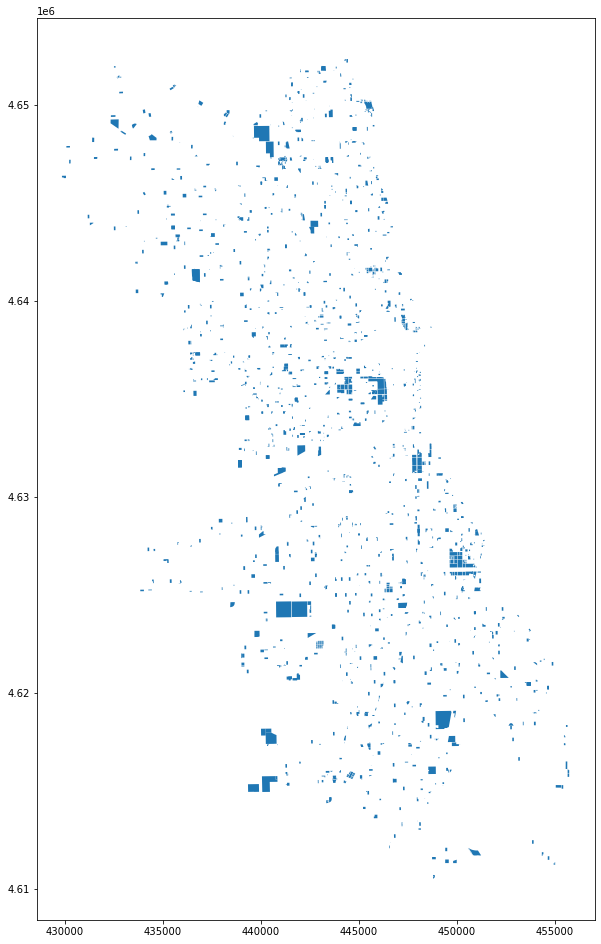

In [78]:
school_cook_chicago_clip.plot(figsize=(10,20))

### Save dataframes
- pickle for own record
- export as transformed shapefiles for group

In [59]:
for gdf in shp_files:
    gdf.to_pickle('./data/pickle/' + gdf.name)

In [60]:
# df will not take assignment of name attribute and therefore won't work in loop
chicago_boundaries.to_pickle('./data/pickle/chicago_boundaries')

### Next Steps
- clean up data gathering notebook
    - make decision on whether to use api or not
     - options are use api for datasets that i can
     - data that can't be generated via api:
         - forestry
         - cook county schools
         - daycare centers
         
- segment cook county data from chicago for:
    - schools_cook_county
    - daycare
